In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [5]:
df = pd.read_excel('w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('w4-40-equal-v4.xlsx')

# Tiancheng's data 

From DMRG we get:

$\mu_c = 4.24$ for EQ-PP crossing. Let's check if we can do better than Finite differences.

for $W = 4$ and $L = 40$:

Finite differences in DMRG suggest $h = 1.3$

QMC suggests $n_{up} = 0.16$ and $n_{down} = 0.157$. $N_{up} = 25-26$ and $N_{down} = 25$

for DMRG values QMC gives $n_{up} = 0.173$ and $n_{down} = 0.128$ $N_{up} = 27-28$ and $N_{up} = 20-21$

In [33]:
h_range = np.arange(1,2,0.01)

In [7]:
len(h_range)

1000

In [9]:
# E - mu(Nup+Ndown) - h(Nup - Ndown) = 0

In [73]:
df2.query("Nup_total == 51 ").sort_values(by = 'Nup_total')

,Unnamed: 0,truncation_error,E,L,Ndown_total,Nup_total
65,65,0.000002,-429.917833,40,51,51
82,82,0.000004,-418.926323,40,49,51


In [20]:
def get_mu_range(df, nup, ndown, h_range):
    E = df.query(f"Nup_total == {nup} and Ndown_total == {ndown}").E.values[0]
    mu_range = [(E - h*(nup-ndown))/((nup+ndown)) for h in h_range]
    return mu_range

In [38]:

def mu(nup = 19, ndown = 17):
    
    return get_mu_range(df2, nup , ndown, h_range)

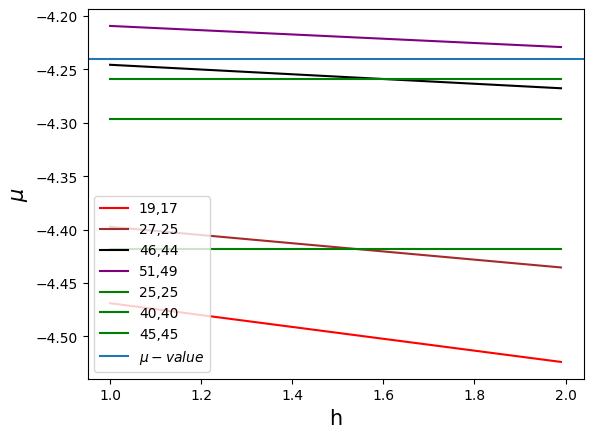

In [81]:
_ = plt.plot(h_range, mu(19,17), label = '19,17', c = 'r')
_ = plt.plot(h_range, mu(27,25), label = '27,25', c = 'brown')
_ = plt.plot(h_range, mu(46,44), label = '46,44', c = 'black')
_ = plt.plot(h_range, mu(51,49), label = '51,49', c = 'purple')
_ = plt.plot(h_range, mu(25,25), label = '25,25', c = 'g')
_ = plt.plot(h_range, mu(40,40), label = '40,40', c = 'g')
_ = plt.plot(h_range, mu(45,45), label = '45,45', c = 'g')

plt.axhline(-4.24, label = r'$\mu-value$')
plt.xlabel('h', size = 15)
plt.ylabel(r'$\mu$', size = 15)
plt.legend()

# Where can we get from here?

Data suggest that using the equation $E - \mu(Nup+Ndown) - h(Nup - Ndown) = 0$ for finding the crossing point with $\mu = 4.24$ gives some stramge results, say, If QMC gives us $h = 1.03$ , 

from DMRG data we are getting some similar results only for $Nup = 46$ and $Ndown = 44$, black line on the graph above.

We only used $Nup = Ndown$ or $Nup = Ndown + 2$ data points, that we had previously. may be we can do better for other values of $Nup - Ndown$. Let's try. Unfortunately Energy values in DMRG have converged only +- up to 0.1, but that should be enough for qualitative results.

In [88]:
files_list = sorted([i for i in os.listdir('en_2') if i.startswith('out') and i > 'out_1750589'])

In [91]:
path_part = os.getcwd()+'/en_2/'

In [96]:
import re

In [102]:
def read_log_file(path):
    with open(path) as f:
        lst = []
        for line in f:
            if 'Initial energy' in line:
                ups = line.count('Up')
                downs = line.count('Dn')
            if 'Energy after sweep' in line:
                lst.append(float(re.findall(r'[-\d\.]+',line)[2]))

    return ups, downs, min(lst)

In [105]:
df_new = pd.DataFrame(read_log_file(path_part+i) for i in files_list)
df_new.columns = ['Nup_total', 'Ndown_total', 'E']

In [107]:
df_new.sort_values(by = 'Nup_total')

,Nup_total,Ndown_total,E
25,20,15,-150.741564
1,20,19,-172.966975
17,20,16,-156.311659
9,20,17,-161.864178
2,21,20,-181.500691
18,21,17,-164.842154
10,21,18,-170.409906
26,21,16,-159.287183
3,22,21,-190.007600
19,22,18,-173.393792


In [109]:
def mu2(nup = 19, ndown = 17):
    
    return get_mu_range(df_new, nup , ndown, h_range)

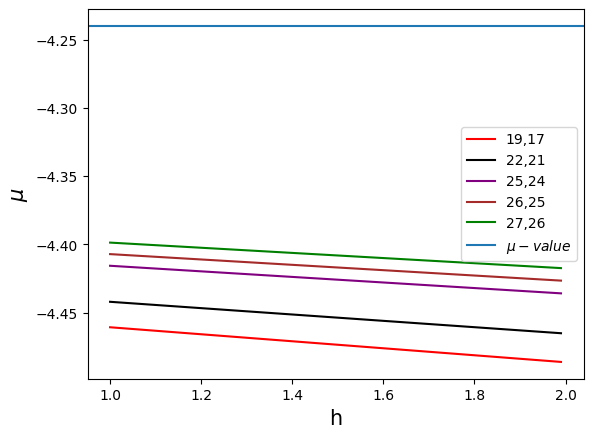

In [127]:
_ = plt.plot(h_range, mu2(20,19), label = '19,17', c = 'r')
_ = plt.plot(h_range, mu2(22,21), label = '22,21', c = 'black')
_ = plt.plot(h_range, mu2(25,24), label = '25,24', c = 'purple')
_ = plt.plot(h_range, mu2(26,25), label = '26,25', c = 'brown')
_ = plt.plot(h_range, mu2(27,26), label = '27,26', c = 'g')

plt.axhline(-4.24, label = r'$\mu-value$')
plt.xlabel('h', size = 15)
plt.ylabel(r'$\mu$', size = 15)
plt.legend()

# Nup = Ndown + 3

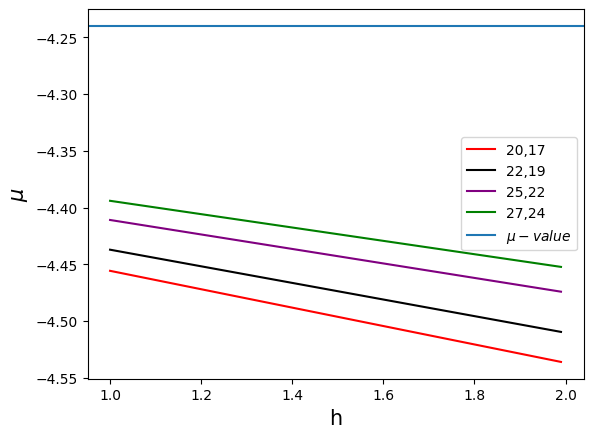

In [111]:
_ = plt.plot(h_range, mu2(20,17), label = '20,17', c = 'r')
_ = plt.plot(h_range, mu2(22,19), label = '22,19', c = 'black')
_ = plt.plot(h_range, mu2(25,22), label = '25,22', c = 'purple')
_ = plt.plot(h_range, mu2(27,24), label = '27,24', c = 'g')

plt.axhline(-4.24, label = r'$\mu-value$')
plt.xlabel('h', size = 15)
plt.ylabel(r'$\mu$', size = 15)
plt.legend()

# Nup = Ndown + 4

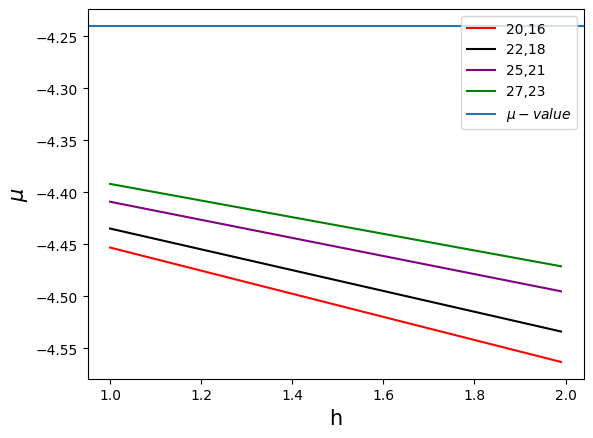

In [112]:
_ = plt.plot(h_range, mu2(20,16), label = '20,16', c = 'r')
_ = plt.plot(h_range, mu2(22,18), label = '22,18', c = 'black')
_ = plt.plot(h_range, mu2(25,21), label = '25,21', c = 'purple')
_ = plt.plot(h_range, mu2(27,23), label = '27,23', c = 'g')

plt.axhline(-4.24, label = r'$\mu-value$')
plt.xlabel('h', size = 15)
plt.ylabel(r'$\mu$', size = 15)
plt.legend()

If I am getting everything right, looks like we cannot match the data better than we already did 



# Data for E(Nup = Ndown+1)

In [116]:
df_new.query('Nup_total == Ndown_total+1').sort_values(by = 'Nup_total')

,Nup_total,Ndown_total,E
1,20,19,-172.966975
2,21,20,-181.500691
3,22,21,-190.007600
4,23,22,-198.488298
5,24,23,-206.942144
6,25,24,-215.366984
7,26,25,-223.763166
0,27,26,-232.130538


In [125]:
df_new.query('Nup_total == 26 and Ndown_total == 25')

,Nup_total,Ndown_total,E
7,26,25,-223.763166
